Scenario: Healthcare – Predicting Patient Readmission
A hospital wants to predict whether patients are likely to be readmitted within 30 days of discharge. They have historical data about patients, including:
Age
BMI (Body Mass Index)
Blood_Pressure (average systolic reading)
Days_Hospitalized
Satisfaction_Score (post-discharge survey rating)
Readmitted (Yes/No)
Since individual decision trees can be unstable, the hospital applies Bagging or Random Forest to build an ensemble of trees. This helps reduce variance and improves accuracy in predicting patient readmission risk, which is critical for resource planning and patient care.
 

In [56]:
import pandas as pd
import numpy as np

In [57]:
df=pd.read_csv("healthcare_readmission_500.csv")
df.size

3500

In [58]:
df.head(2)

,Patient_ID,Age,BMI,Blood_Pressure,Days_Hospitalized,Satisfaction_Score,Readmitted
0,PAT1000,63,30.1,139,3,4.7,No
1,PAT1001,76,40.0,118,4,1.9,Yes


In [59]:
df=df.drop(columns=["Patient_ID"])

In [60]:
colms=["Readmitted"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in colms:
    df[col] = le.fit_transform(df[col])


In [61]:
df.head(2)

,Age,BMI,Blood_Pressure,Days_Hospitalized,Satisfaction_Score,Readmitted
0,63,30.1,139,3,4.7,0
1,76,40.0,118,4,1.9,1


In [62]:
X=df.drop(columns=["Readmitted"])
y=df['Readmitted']

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [65]:
model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=6,        # limit tree depth
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


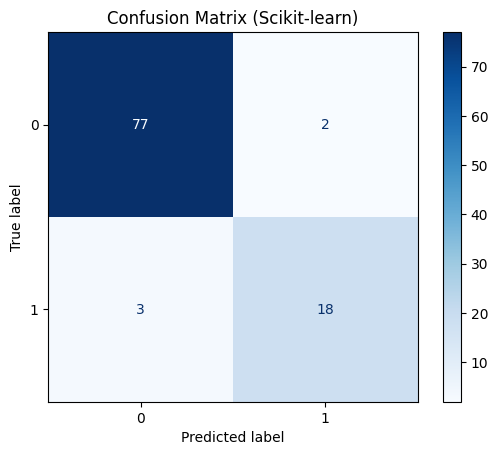

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

class_names = df["Readmitted"].unique()
# 3. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues) # You can change the color map (e.g., 'Greens', 'plasma')
plt.title("Confusion Matrix (Scikit-learn)")
plt.show()